# Receptive Field Analysis
This notebook demonstrates how to run the receptive field analysis module.  First we import packages.

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.receptive_field_analysis.visualization as rfvis
import allensdk.brain_observatory.receptive_field_analysis.receptive_field as rf
import matplotlib.pyplot as plt
%matplotlib inline

Given a cell of interest, we now identify the experiment that contains the locally sparse noise stimulus and download its NWB file.  We also look in the NWB file to figure out which cell has the ID we're interested in.

In [2]:
cell_specimen_id = 587377366

boc = BrainObservatoryCache(manifest_file='boc/manifest.json', 
                            base_uri='http://iwarehouse')

exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id],
                                 stimuli=['locally_sparse_noise'])

data_set = boc.get_ophys_experiment_data(exps[0]['id'])

cell_index = data_set.get_cell_specimen_ids().tolist().index(cell_specimen_id)

print("cell %d has index %d" % (cell_specimen_id, cell_index))

cell 587377366 has index 5


## Compute receptive fields
The following method in the `receptive_field_analysis module` will run characterize receptive on and off receptive fields.  

In [3]:
rf_data = rf.compute_receptive_field_with_postprocessing(data_set, 
                                                         cell_index, 
                                                         'locally_sparse_noise', 
                                                         alpha=0.5, 
                                                         number_of_shuffles=10000)

## Chi^2 significance map
some text

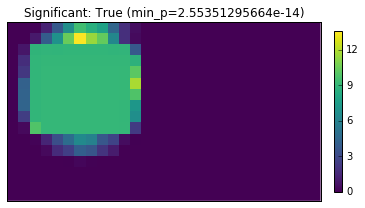

In [4]:
rfvis.plot_chi_square_summary(rf_data)
plt.show()

## Response-triggered stimulus field
some text

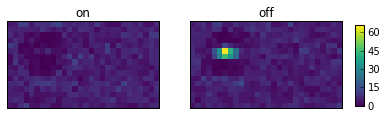

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_summary(rf_data, ax1, ax2)

## Blurred response-triggered stimulus field
some text

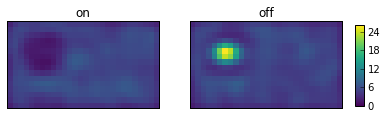

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_blur_summary(rf_data, ax1, ax2)

## p value field

some text

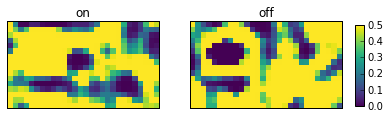

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_p_values(rf_data, ax1, ax2)

## Significance mask

some text

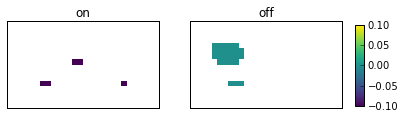

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_mask(rf_data, ax1, ax2)

## Gaussian fit

some text

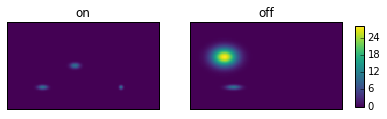

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_gaussian_fit(rf_data, ax1, ax2)

## 4 vs 8 degree sparse noise stimuli
Newer experiments switched from using a single locally sparse noise stimulus with 4-visual-degree pixels to two blocks of stimuli with different pixel sizes (a 4 degree block and an 8 degree block).  You can characterize the receptive fields from reponses to each stimulus block separately.

In [10]:
cell_specimen_id = 559109414
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id])
for exp in exps:
    print boc.get_ophys_experiment_stimuli(exp['id'])

['locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_two', 'spontaneous']
['drifting_gratings', 'natural_movie_one', 'natural_movie_three', 'spontaneous']
['static_gratings', 'natural_scenes', 'natural_movie_one', 'spontaneous']


This cell comes from an experiment that has the new 4 degree and 8 degree stimulus blocks.  Let's find the experiment that contains the 8 degree stimulus.

In [15]:
exp = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id],
                                stimuli=['locally_sparse_noise_8deg'])
data_set = boc.get_ophys_experiment_data(exps[0]['id'])
cell_index = data_set.get_cell_specimen_ids().tolist().index(cell_specimen_id)
print("cell %d has index %d" % (cell_specimen_id, cell_index))

cell 559109414 has index 152


Now we can run the receptive field analysis as before and see what this looks like.

In [12]:
rf_data = rf.compute_receptive_field_with_postprocessing(data_set, 
                                                         cell_index, 
                                                         'locally_sparse_noise_8deg', 
                                                         alpha=0.5, 
                                                         number_of_shuffles=10000)

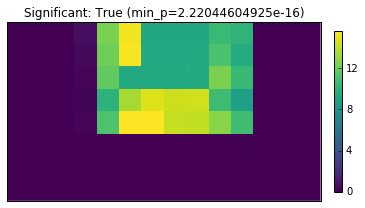

In [13]:
rfvis.plot_chi_square_summary(rf_data)
plt.show()

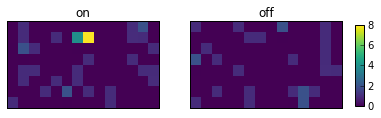

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_summary(rf_data, ax1, ax2)